In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'D:\DA Projects\4- Feature Extraction and Price Prediction for Mobile Phones\dataset\Processed_Flipdata - Processed_Flipdata.csv')

In [3]:
df.head()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"


In [4]:
df['Prize']=df['Prize'].str.replace(',','').astype(int)

### Product Strategy & Market Fit

#### 1- What price segment has the most models (low/mid/high)?

In [5]:
df['Prize'].describe()

count      541.000000
mean     16228.375231
std      10793.588322
min        920.000000
25%       9290.000000
50%      13499.000000
75%      19280.000000
max      80999.000000
Name: Prize, dtype: float64

Text(0, 0.5, 'Prize')

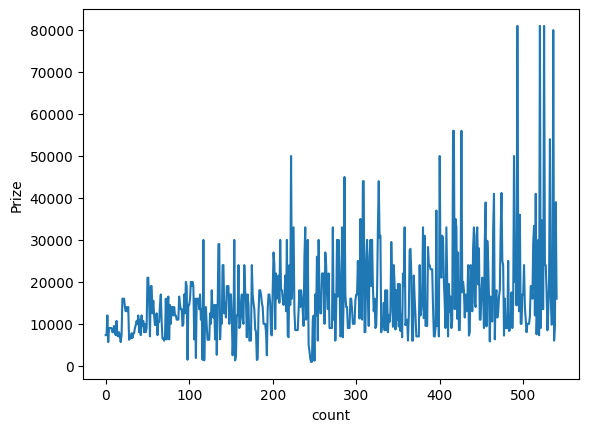

In [6]:
plt.plot(df['Prize'],)
plt.xlabel('count')
plt.ylabel('Prize')

In [7]:
conditions=[
    df['Prize']<=10000,
    (df['Prize']>10000) & (df['Prize']<=30000),
    df['Prize']>30000
]
segments=['Low','Medium','High']
df['Prize Segment']=np.select(conditions,segments,default='Unknown')

In [8]:
df.groupby('Prize Segment')['Model'].count()

Prize Segment
High       46
Low       179
Medium    316
Name: Model, dtype: int64

**Insight**-- Mostly models are in medium range

2. **Which Model dominates specific price ranges?**

In [9]:
df.groupby('Prize Segment')['Model'].value_counts().groupby(level=0).head(1)

Prize Segment  Model                
High           SAMSUNG Galaxy A34 5G    5
Low            Infinix HOT 30i          8
Medium         REDMI Note 12 Pro 5G     9
Name: count, dtype: int64

3. **Do phones with high RAM also tend to have better cameras or batteries?**

In [10]:
df['Front Camera']=df['Front Camera'].str.replace('MP','').astype(int)
df['Rear Camera']=df['Rear Camera'].str.replace('MP','').astype(int)

In [11]:
df.columns

Index(['Unnamed: 0', 'Model', 'Colour', 'Memory', 'RAM', 'Battery_',
       'Rear Camera', 'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_',
       'Prize', 'Prize Segment'],
      dtype='object')

In [12]:
df[['RAM','Front Camera','Rear Camera','Battery_']].corr()

,RAM,Front Camera,Rear Camera,Battery_
RAM,1.000000,0.493861,0.439558,-0.104923
Front Camera,0.493861,1.000000,0.505378,0.032970
Rear Camera,0.439558,0.505378,1.000000,0.198260
Battery_,-0.104923,0.032970,0.198260,1.000000


<Figure size 2000x2000 with 0 Axes>

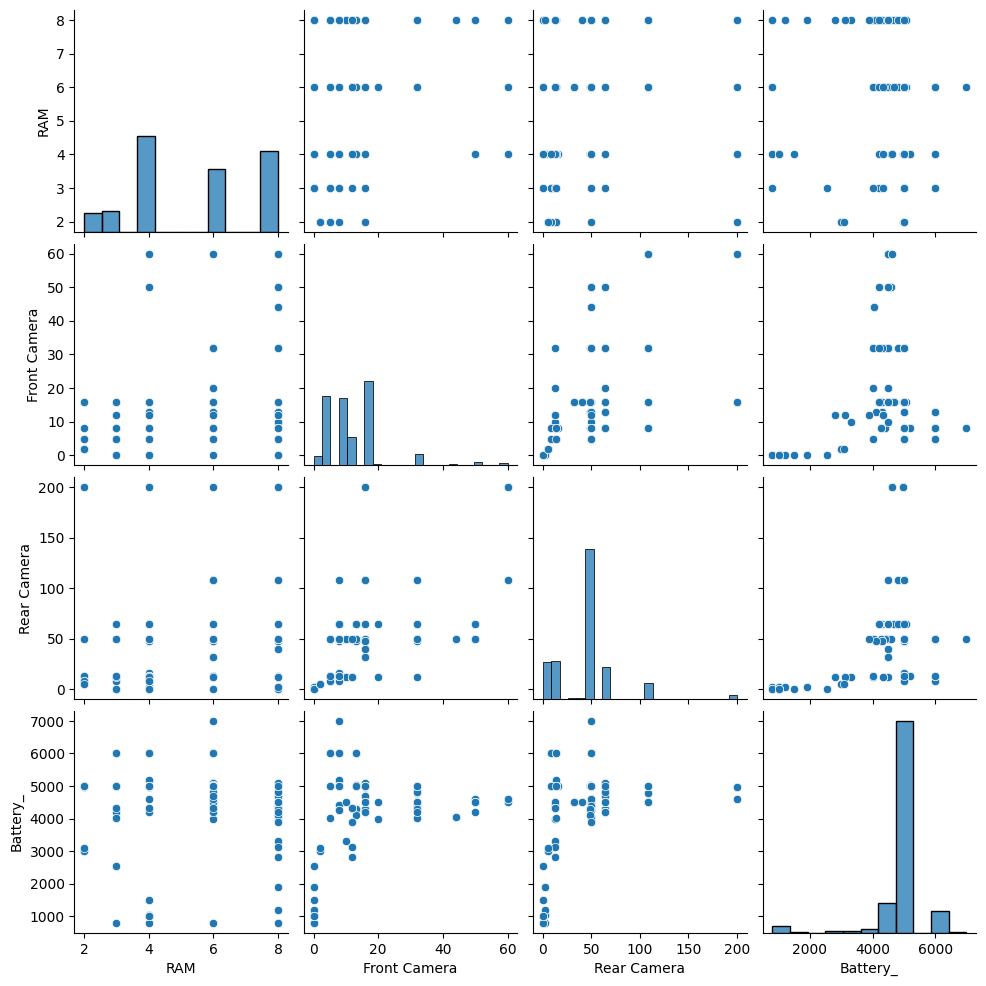

In [13]:
plt.figure(figsize=(20,20))
sns.pairplot(data=df[['RAM','Front Camera','Rear Camera','Battery_']])

Insights-- ram is positive corelated with camera but negative corelated with battery.

4. **How does internal storage affect price compared to RAM or battery?**

In [14]:
df[['Memory','RAM','Battery_','Prize']].corr()

,Memory,RAM,Battery_,Prize
Memory,1.000000,0.625284,-0.053210,0.566660
RAM,0.625284,1.000000,-0.104923,0.532024
Battery_,-0.053210,-0.104923,1.000000,-0.034297
Prize,0.566660,0.532024,-0.034297,1.000000


Insights--Internal storage affects more posive to price than battery but less with RAM  


### 📊 **Customer Preference Trends**

5. **Which features show the strongest correlation with price?**

In [16]:
num_cols=df.select_dtypes(exclude='O').columns
df[num_cols].corr()

,Unnamed: 0,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Prize
Unnamed: 0,1.000000,0.120579,0.084103,-0.057136,0.036324,0.233370,-0.160373,0.015372,0.333940
Memory,0.120579,1.000000,0.625284,-0.053210,0.530615,0.496865,-0.094442,0.063163,0.566660
RAM,0.084103,0.625284,1.000000,-0.104923,0.439558,0.493861,-0.082622,0.092951,0.532024
Battery_,-0.057136,-0.053210,-0.104923,1.000000,0.198260,0.032970,0.150156,0.695641,-0.034297
Rear Camera,0.036324,0.530615,0.439558,0.198260,1.000000,0.505378,-0.043597,0.239883,0.410367
Front Camera,0.233370,0.496865,0.493861,0.032970,0.505378,1.000000,-0.111779,0.208012,0.532321
AI Lens,-0.160373,-0.094442,-0.082622,0.150156,-0.043597,-0.111779,1.000000,0.052018,-0.153691
Mobile Height,0.015372,0.063163,0.092951,0.695641,0.239883,0.208012,0.052018,1.000000,0.176009
Prize,0.333940,0.566660,0.532024,-0.034297,0.410367,0.532321,-0.153691,0.176009,1.000000


Insights-- Memory and RAM are highly corelated with price

### 🏷️ **Pricing & Competitive Strategy**

6. **Can we predict a phone’s price based on specs with high accuracy?**

Insights--yes we can predict

7. **What is the average price difference per additional GB of RAM or storage?**

In [20]:
df[['RAM','Prize']].corr()

,RAM,Prize
RAM,1.000000,0.532024
Prize,0.532024,1.000000


8. **Is there a specific screen size range preferred in high-priced models?**

In [21]:
from sklearn.linear_model import LinearRegression

X = df[['RAM']]
y = df['Prize']

model = LinearRegression()
model.fit(X, y)

price_per_gb_ram = model.coef_[0]
print(f"Average price increase per GB of RAM: ₹{price_per_gb_ram:.2f}")


Average price increase per GB of RAM: ₹2893.04
